<a href="https://colab.research.google.com/github/kkhtet/DSL_HOMEWORK/blob/main/VerilogGitHomework(1003437%20Kaung%20Khant%20Htet).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Setup

In [ ]:
!pip install git+https://github.com/pe8sutd/eda4u &> /dev/null
!git clone https://github.com/pe8sutd/eda4u &> /dev/null
%load_ext plugin

# Homework

Copy this ipynb to your Github and link to Google Colab for Verilog HDL simulation.

Submit the copy of ipynb with complete solution to the DSL Edimension: Homework Submission.

# Q1-Decade Counter

1. Useful commands: %%verilog, %%waveform
2. Write Verilog source files (module and testbench), description of the decade_counter as shown below using if-else statements.
3. Submit this file to DSL edimension for assessment;
4. The specification of the decade_counter are:
  - When "rst" is high, the output "count" and output "ten" are set to ‘0’ immediately and counting is disabled.
  - When "rst" is low, the circuit increments on every positive edge of the clk.
  - The highest count that can be reached is 4'b1001, after which the count will restart from 4'b0000 again.
  - Only when the count is 4'b1001, the output ten is set to ‘1’ else the output ten will always be set to ‘0’.

5. Write a Verilog test stimulus module for the decade_counter and verify its proper operation as follows:
  - Create a clock (Period: 20 unit time);
  - Test for reset active;
  - Then test for the counting for 1 complete count cycles ie: counting from 4'b0000 to 4'b1001;
  - Use Weveform Viewer for viewing the inputs and outputs;
  - Here is Verilog code template.

In [57]:
%%verilog

//!DO NOT EDIT MODULE NAME AND PORT NAME!
module decade_counter(
    input clk,
    input rst,
    output reg [3:0] count,
    output reg ten
);

always @(posedge clk) begin
    if (rst) begin
        count <= 4'b0000; // Reset count to 0
        ten <= 1'b0;      // Reset ten to 0
    end else if (count == 4'b1001) begin
        count <= 4'b0000; // Reset count to 0 after reaching 9
        ten <= 1'b1;      // Set ten to 1 when count is 9
    end else begin
        count <= count + 1'b1; // Increment count
        ten <= 1'b0;      // Keep ten at 0 during counting
    end
end

endmodule
////

//!DO NOT EDIT MODULE NAME AND PORT NAME!
module decade_counter_tb();

reg clk;
reg rst;
wire [3:0] count;
wire ten;

decade_counter decade_counter_u0(
    .clk(clk),
    .rst(rst),
    .count(count),
    .ten(ten)
);

always begin
    clk = ~clk; // Toggle clock every 20 time units
    #20;
end

initial begin
    $monitor("%d clk=%b, rst=%b, count=%b, ten=%b", $time, clk, rst, count, ten); // Print values
    $dumpfile("tb.vcd");    // Create waveform dump file
    $dumpvars();          // Dump all variables
    #0 clk = 0;            // Initialize clock to 0
    #0 rst = 1;            // Initialize reset to 1
    #25 rst = 0;           // Deactivate reset after 25 time units
    #200 $finish;          // End simulation after 200 time units
    $dumpoff;            // Stop waveform dumping
end

endmodule



VCD info: dumpfile tb.vcd opened for output.
                   0 clk=0, rst=1, count=xxxx, ten=x
                  20 clk=1, rst=1, count=0000, ten=0
                  25 clk=1, rst=0, count=0000, ten=0
                  40 clk=0, rst=0, count=0000, ten=0
                  60 clk=1, rst=0, count=0001, ten=0
                  80 clk=0, rst=0, count=0001, ten=0
                 100 clk=1, rst=0, count=0010, ten=0
                 120 clk=0, rst=0, count=0010, ten=0
                 140 clk=1, rst=0, count=0011, ten=0
                 160 clk=0, rst=0, count=0011, ten=0
                 180 clk=1, rst=0, count=0100, ten=0
                 200 clk=0, rst=0, count=0100, ten=0
                 220 clk=1, rst=0, count=0101, ten=0



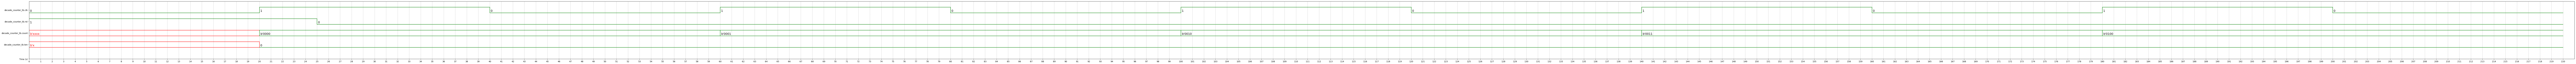

In [58]:
%%waveform tb.vcd
sign_list = ['decade_counter_tb.clk', 'decade_counter_tb.rst', 'decade_counter_tb.count', 'decade_counter_tb.ten']
time_begin = 0
time_end = 220
base = 'bin' #bin,dec,dec2,hex,octal

6. The following figure is the test results for reference only. Your results maybe cover more test case if required.

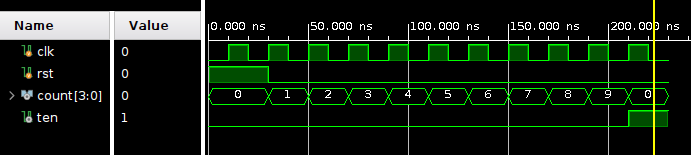

# Q2-Multiplexer

1. Useful commands: %%verilog, %%waveform
2. Write Verilog source files (module and testbench), description of the multiplexer as shown below using case statements.
3. The specifications of the multiplexer are:
  - The circuit is a 4-to-1 multiplexer;
  - The inputs A, B, C, D and output X are all 2-bit vectors;
  - Output X will be equal to either one of the 4 inputs depending on the 4 combinations of 2-bits signal SEL. The following True-table details the relationship between SEL and output X;

| SEL   | OUTPUT X |
|-------|----------|
| 2'b00 | A        |
| 2'b01 | B        |
| 2'b10 | C        |
| 2'b11 | D        |


4. Write a Verilog test stimulus module for the multiplexer;


In [63]:
%%verilog

//!DO NOT EDIT MODULE NAME AND PORT NAME!
module multiplexer(
    input [1:0]A,
    input [1:0]B,
    input [1:0]C,
    input [1:0]D,
    input [1:0]SEL,
    output reg [1:0]X
);

//YOUR CODE HERE
//TIPS: IN THE VERILOG CASE STATEMENT, YOU HAVE TO LIST ALL CONDITION TO AVIOD ANY AMBIGUOUS STATEMENT;


always @(*) begin
    case(SEL)
        2'b00: X = A;
        2'b01: X = B;
        2'b10: X = C;
        2'b11: X = D;
        default: X = 2'b00; // Default case for synthesis
    endcase
end

endmodule

//TESTBENCH HERE

module multiplexer_tb();

reg [1:0]A;
reg [1:0]B;
reg [1:0]C;
reg [1:0]D;
reg [1:0]SEL;
wire [1:0]X;

multiplexer multiplexer_u0(
    .A(A),
    .B(B),
    .C(C),
    .D(D),
    .SEL(SEL),
    .X(X)
);

initial begin
    // Initialize inputs
    A = 2'b00; B = 2'b01; C = 2'b10; D = 2'b11;
    SEL = 2'b00;

    // Setup for waveform dumping
    $monitor("%d A=%b, B=%b, C=%b, D=%b, SEL=%b, X=%b", $time, A, B, C, D, SEL, X);
    $dumpfile("tb.vcd");
    $dumpvars();

    // Apply input stimulus
    #10 SEL = 2'b01;
    #10 SEL = 2'b10;
    #10 SEL = 2'b11;
    #10;

    // Finish simulation and stop dumping
    $finish;
    $dumpoff;
end

endmodule


VCD info: dumpfile tb.vcd opened for output.
                   0 A=00, B=01, C=10, D=11, SEL=00, X=00
                  10 A=00, B=01, C=10, D=11, SEL=01, X=01
                  20 A=00, B=01, C=10, D=11, SEL=10, X=10
                  30 A=00, B=01, C=10, D=11, SEL=11, X=11



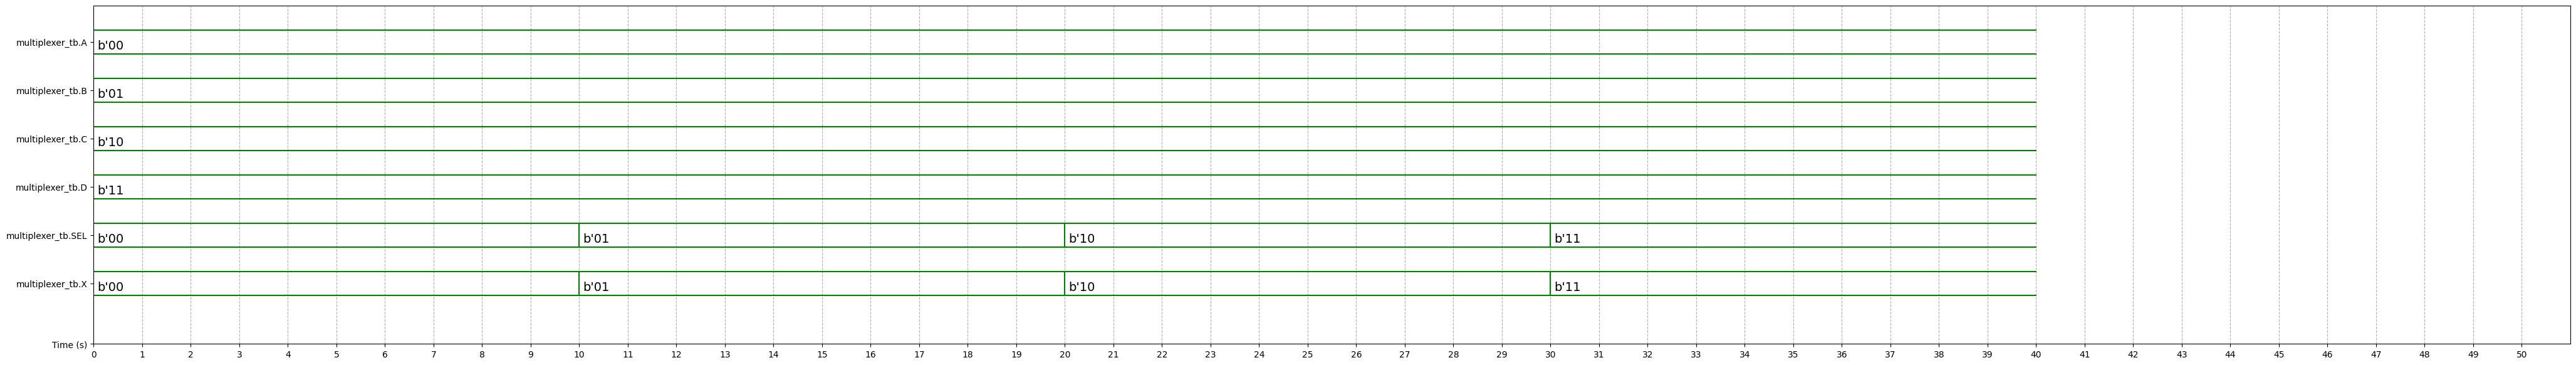

In [64]:
%%waveform tb.vcd
sign_list = ['multiplexer_tb.A', 'multiplexer_tb.B', 'multiplexer_tb.C', 'multiplexer_tb.D', 'multiplexer_tb.SEL', 'multiplexer_tb.X']
time_begin = 0
time_end = 50
base = 'bin' #bin,dec,dec2,hex,octal

5. Here is a demo testbench result for the multiplexer;

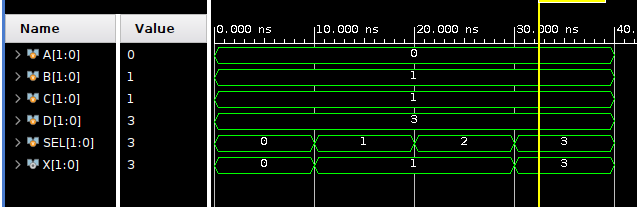

# Q3-Demultiplexer

1. Useful commands: %%verilog, %%waveform
2. Write Verilog source files (module and testbench), description of the demultiplexer as shown below using case statements. Saved the Verilog description as q3_xxxxxxx.v, and q3_tb_xxxxxxx.v;
3. The specifications of the demultiplexer are:
  - It is a 1-to-4 demultiplexer.
  - Input A and outputs W, X, Y, and Z are all 2-bit vectors.
  - SEL is a 2-bit select input.
  - Each of the 4 combinations of SEL will determine which of the 4 outputs will receive the value of input A.
  - When one output is equal to A, all other outputs are equal to ‘0’.

| SEL   | OUTPUT W | OUTPUT X | OUTPUT Y | OUTPUT Z |
|-------|----------|----------|----------|----------|
| 2'b00 | A        | 2'b00    | 2'b00    | 2'b00    |
| 2'b01 | 2'b00    | A        | 2'b00    | 2'b00    |
| 2'b10 | 2'b00    | 2'b00    | A        | 2'b00    |
| 2'b11 | 2'b00    | 2'b00    | 2'b00    | A        |


4. Write a Verilog test stimulus module for the demultiplexer;





In [66]:
%%verilog

//!DO NOT MODIFY MODULE NAME AND PORT NAME!
module demultiplexer(
    input [1:0]A,
    input [1:0]SEL,
    output reg[1:0]W,
    output reg[1:0]X,
    output reg[1:0]Y,
    output reg[1:0]Z
    );

//YOUR CODE HERE

always @(*) begin
  case (SEL)
    2'b00: begin
      W = A;
      X = 2'b00;
      Y = 2'b00;
      Z = 2'b00;
    end
    2'b01: begin
      W = 2'b00;
      X = A;
      Y = 2'b00;
      Z = 2'b00;
    end
    2'b10: begin
      W = 2'b00;
      X = 2'b00;
      Y = A;
      Z = 2'b00;
    end
    2'b11: begin
      W = 2'b00;
      X = 2'b00;
      Y = 2'b00;
      Z = A;
    end
    default: begin // for synthesis
      W = 2'b00;
      X = 2'b00;
      Y = 2'b00;
      Z = 2'b00;
    end
  endcase
end

endmodule

//TESTBENCH HERE
module demultiplexer_tb();

reg [1:0]A;
reg [1:0]SEL;
wire [1:0]W;
wire [1:0]X;
wire [1:0]Y;
wire [1:0]Z;

demultiplexer demultiplexer_u0(
    .A(A),
    .SEL(SEL),
    .W(W),
    .X(X),
    .Y(Y),
    .Z(Z)
);

initial begin
    // Initialize inputs
    A = 2'b10;
    SEL = 2'b00;

    // Setup for waveform dumping
    $monitor("%d A=%b, SEL=%b, W=%b, X=%b, Y=%b, Z=%b", $time, A, SEL, W, X, Y, Z);
    $dumpfile("tb.vcd");
    $dumpvars();

    // Apply input stimulus
    #10 SEL = 2'b01;
    #10 SEL = 2'b10;
    #10 SEL = 2'b11;
    #10;

    // Finish simulation and stop dumping
    $finish;
    $dumpoff;
end

endmodule



VCD info: dumpfile tb.vcd opened for output.
                   0 A=10, SEL=00, W=10, X=00, Y=00, Z=00
                  10 A=10, SEL=01, W=00, X=10, Y=00, Z=00
                  20 A=10, SEL=10, W=00, X=00, Y=10, Z=00
                  30 A=10, SEL=11, W=00, X=00, Y=00, Z=10



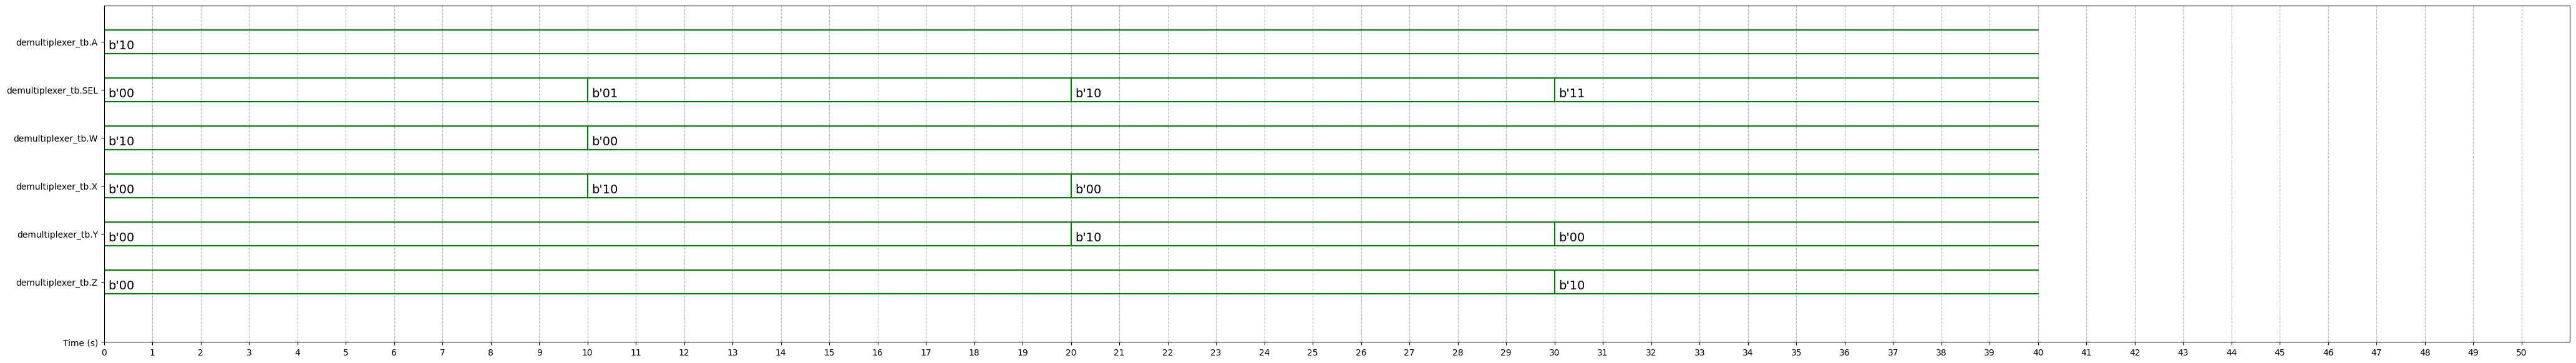

In [67]:
%%waveform tb.vcd
sign_list = ['demultiplexer_tb.A', 'demultiplexer_tb.SEL', 'demultiplexer_tb.W', 'demultiplexer_tb.X', 'demultiplexer_tb.Y', 'demultiplexer_tb.Z']
time_begin = 0
time_end = 50
base = 'bin'

5. Here is a demo testbench result for the demultiplexer;

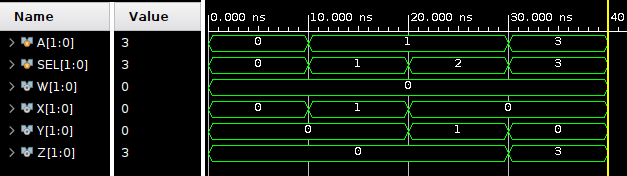

# Q4-Nibbleadd

1. Useful commands: %%verilog, %%waveform
2. Write Verilog source files (module and testbench), description of the nibbleadd.
3. The specifications for this module nibbleadd are:
  - Inputs A and B are both 8-bit vector inputs. Output q is 5-bit wide.
  - When ctrl input is ‘0’, output is the sum of lowest 4 bits of A and B.
  - When ctrl input is ‘1’, output is the sum of upper 4 bits of A and B.
  - Here is Verilog code template. You have to copy the template into your source file.

4. Write a Verilog test stimulus module for the nibbleadd;

In [50]:
%%verilog

//!DO NOT MODIFY MODULE NAME AND PORT NAME!
module nibbleadd(
    input [7:0]A,
    input [7:0]B,
    input ctrl,
    output [4:0]q
);


//YOUR CODE HERE

assign q = ctrl ? (A[7:4] + B[7:4]) : (A[3:0] + B[3:0]);


endmodule

//TESTBENCH HERE

module nibbleadd_tb();

reg [7:0]A;
reg [7:0]B;
reg ctrl;
wire [4:0]q;

nibbleadd nibbleadd_u0(
    .A(A),
    .B(B),
    .ctrl(ctrl),
    .q(q)
);

initial begin
    // Initialize inputs
    A = 8'b00001111;
    B = 8'b00001111;
    ctrl = 0;

    // Setup for waveform dumping
    $monitor("%d A=%b, B=%b, ctrl=%b, q=%b", $time, A, B, ctrl, q);
    $dumpfile("tb.vcd");
    $dumpvars();

    // Apply input stimulus
    #10 ctrl = 1;
    #10;

    // Finish simulation and stop dumping
    $finish;
    $dumpoff;
end

endmodule


VCD info: dumpfile tb.vcd opened for output.
                   0 A=00001111, B=00001111, ctrl=0, q=11110
                  10 A=00001111, B=00001111, ctrl=1, q=00000



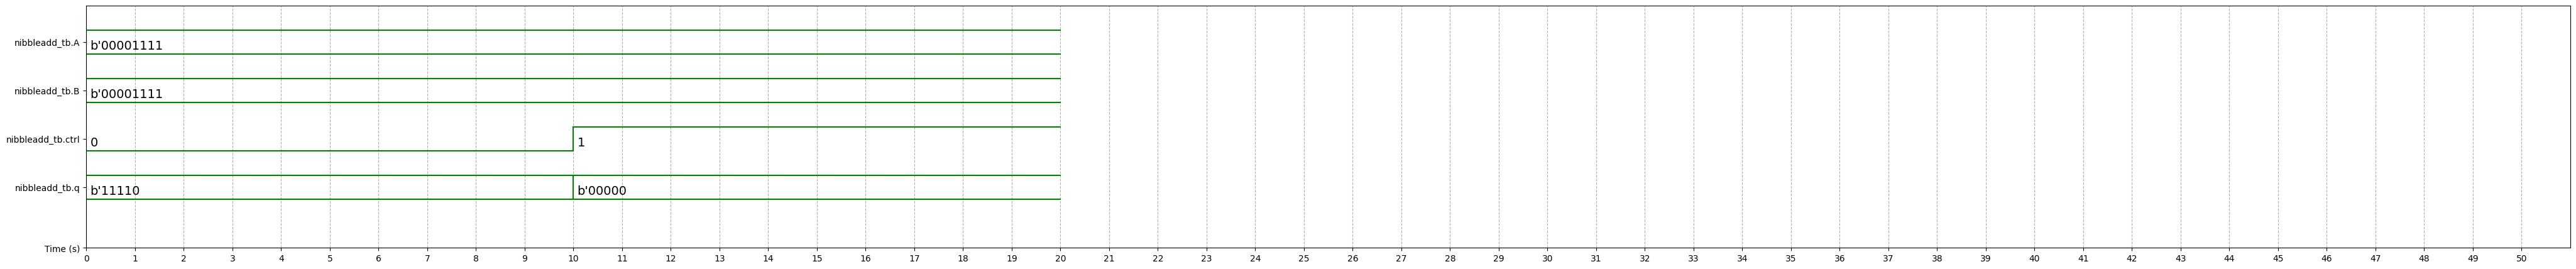

In [51]:
%%waveform tb.vcd
sign_list = ['nibbleadd_tb.A', 'nibbleadd_tb.B', 'nibbleadd_tb.ctrl', 'nibbleadd_tb.q']
time_begin = 0
time_end = 50  # Adjust as needed to cover the simulation time
base = 'bin' #bin,dec,dec2,hex,octal

5. Here is a demo testbench result for the nibbleadd;

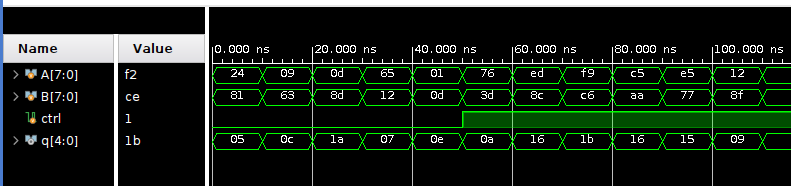

# Q5-CCTA

1. Useful commands: %%verilog, %%waveform
2. Write Verilog source files (module and testbench), description of the CCTA.
3. The specifications for this module CCTA are:
  - Inputs A, B and C are 4-bit vector inputs.
  - Output q is 5-bit wide.
  - rst is active high, when activated q is set to 0;
  - When ctrl input is ‘0’, output q is the sum of A and B.
  - When ctrl input is ‘1’, output q is the difference of A and C.

4. Write a Verilog test stimulus module for the CCTA;

In [52]:
%%verilog

//!DO NOT MODIFY MODULE NAME AND PORT NAME!
module CCTA(
        input [3:0] A,
        input [3:0] B,
        input [3:0] C,
        input rst,
        input ctrl,
        output reg [4:0] q
);

always @(*) begin
  if (rst) begin
    q = 5'b00000;
  end else if (ctrl == 0) begin
    q = A + B;
  end else begin
    q = A - C;
  end
end

endmodule

//TESTBENCH

module CCTA_tb();

reg [3:0] A;
reg [3:0] B;
reg [3:0] C;
reg rst;
reg ctrl;
wire [4:0] q;

CCTA CCTA_u0(
    .A(A),
    .B(B),
    .C(C),
    .rst(rst),
    .ctrl(ctrl),
    .q(q)
);

initial begin
    // Initialize inputs
    A = 4'b0010;
    B = 4'b0011;
    C = 4'b0001;
    rst = 1;

    // Setup for waveform dumping
    $monitor("%d A=%b, B=%b, C=%b, rst=%b, ctrl=%b, q=%b", $time, A, B, C, rst, ctrl, q);
    $dumpfile("tb.vcd");
    $dumpvars();

    // Apply input stimulus
    #10 rst = 0; ctrl = 0;
    #10 ctrl = 1;
    #10;

    // Finish simulation and stop dumping
    $finish;
    $dumpoff;
end

endmodule


VCD info: dumpfile tb.vcd opened for output.
                   0 A=0010, B=0011, C=0001, rst=1, ctrl=x, q=00000
                  10 A=0010, B=0011, C=0001, rst=0, ctrl=0, q=00101
                  20 A=0010, B=0011, C=0001, rst=0, ctrl=1, q=00001



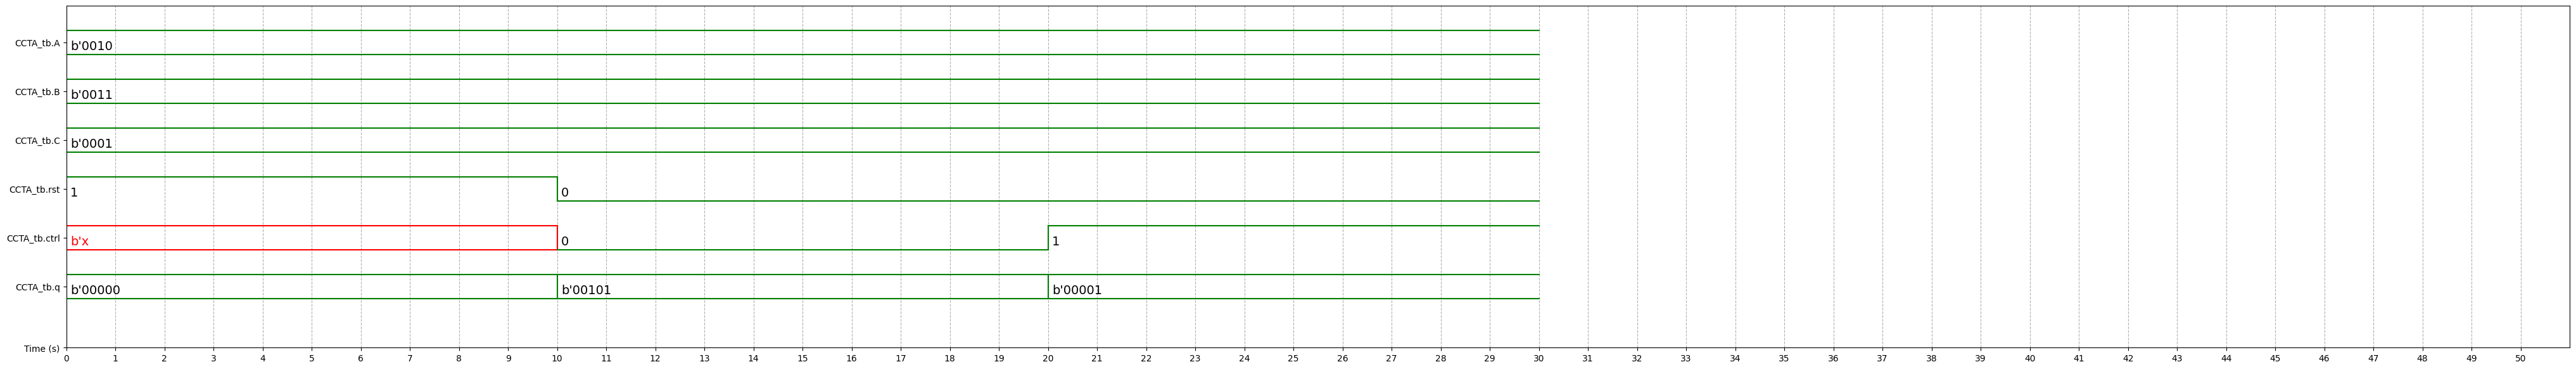

In [53]:
%%waveform tb.vcd
sign_list = ['CCTA_tb.A', 'CCTA_tb.B', 'CCTA_tb.C', 'CCTA_tb.rst', 'CCTA_tb.ctrl', 'CCTA_tb.q']
time_begin = 0
time_end = 50  # Adjust as needed to cover the simulation time
base = 'bin' #bin,dec,dec2,hex,octal

5. Here is a demo testbench result for the CCTA;

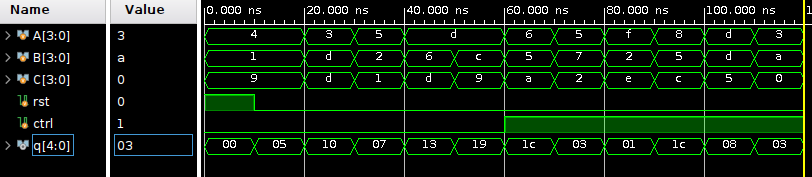